<a href="https://colab.research.google.com/github/jvsiq9603/Introducao-a-ciencia-de-dados-2024.1/blob/main/05_Atividade_sala_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.INTRODUÇÃO

Neste notebook, exploraremos a regressão logística e as métricas de avaliação para algoritmos de classificação binária. Utilizaremos um conjunto de dados sintético para treinar e testar um modelo de regressão logística, e aplicaremos métricas como a matriz de confusão e a curva ROC para avaliar o desempenho do modelo.


#2.IMPORTANDO BIBLIOTECAS


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

#3.Criação do Conjunto de Dados Sintéticos

In [ ]:
# Gerar um conjunto de dados sintético com baixo ruído
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, n_clusters_per_class=1, flip_y=0.01, random_state=42)

# Criar um DataFrame para visualização
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df['Target'] = y

# Visualizar as primeiras linhas do DataFrame
df.head()


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Target
0,4.306084,6.580969,1.776370,4.151568,-0.074992,1.901044,0.294210,2.438312,-2.005369,2.758217,...,1.810240,-3.071663,-5.555195,2.865013,8.533672,-0.345149,-3.244875,1.365786,4.038676,1
1,0.454296,-1.010405,2.835709,3.782444,2.647854,0.946987,0.976550,-4.493244,-0.005233,-0.792392,...,-4.752036,1.022210,-2.679834,8.097266,-1.603008,-2.382203,2.319666,0.919894,-2.434049,0
2,1.602002,4.758161,-0.218513,-0.538691,0.655835,0.758380,-0.947642,-2.294659,-0.329826,-2.220625,...,-1.565567,-6.207366,-6.162882,-3.593671,-5.449653,-2.010057,5.157174,2.935408,3.455591,0
3,1.062172,4.603495,-1.298983,3.310485,-2.337303,-2.477052,-0.516190,-3.360568,-3.257053,0.819154,...,4.122691,-8.970822,-4.505817,1.595365,12.937340,1.703673,-3.243343,3.124246,1.705227,1
4,4.515986,1.772100,3.496134,-1.906343,-1.169720,0.367650,0.444874,2.695685,1.145303,-0.724975,...,-0.535011,-1.542436,-1.688455,-0.272469,-1.078012,-1.475291,2.080629,-3.046110,3.539161,1


Inicialmente com um ruido normal o AUC=0.91 então solicitei que fosse gerado dados com baixo ruido dessa forma consegui um AUC=0.98 mostrando um certo "sobreajuste" do modelo. Da mesma forma quando se aumenta a quantidade de dados o AUC também aumente significativamente.

#4.Divisão do Conjunto de Dados em Treino e Teste

In [ ]:
# Dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#5.Treinamento do Modelo de Regressão Logística

In [ ]:
# Criar o modelo
model = LogisticRegression(max_iter=1000)

# Configurar a validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Obter previsões de validação cruzada
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')
y_proba_cv = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]



#6.Teste do Modelo e Avaliação

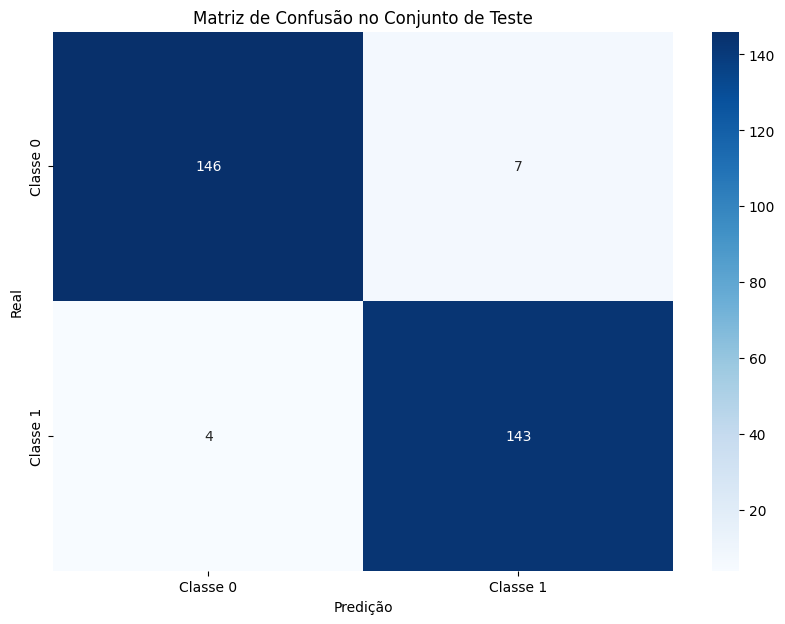

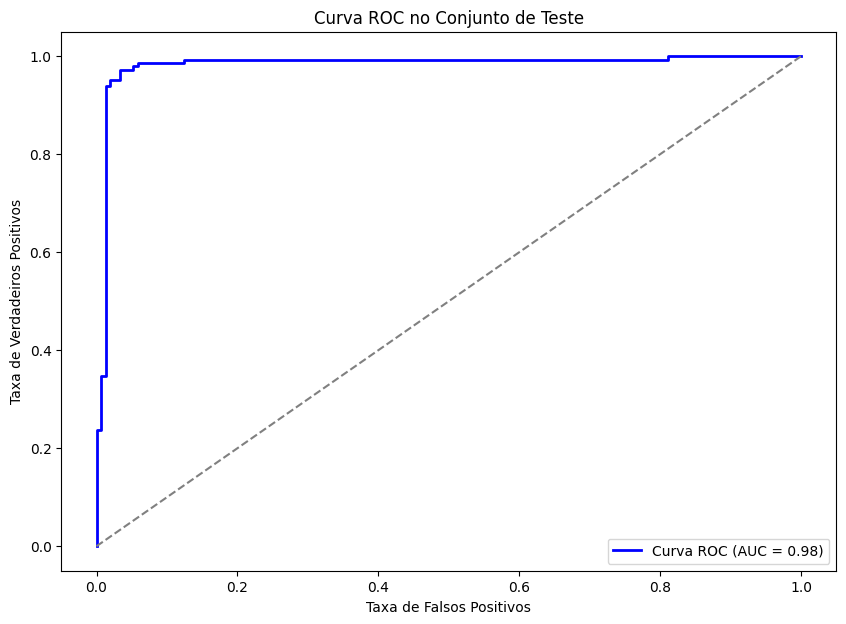

Relatório de Classificação no Conjunto de Teste:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       153
           1       0.95      0.97      0.96       147

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
# Ajustar o modelo aos dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_test = model.predict(X_test)
y_proba_test = model.predict_proba(X_test)[:, 1]

# Calcular a matriz de confusão
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Calcular a curva ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

# Relatório de classificação
class_report_test = classification_report(y_test, y_pred_test)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão no Conjunto de Teste')
plt.show()

# Plotar a curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC no Conjunto de Teste')
plt.legend(loc='lower right')
plt.show()

# Exibir o relatório de classificação
print("Relatório de Classificação no Conjunto de Teste:")
print(class_report_test)





#7.Comentários sobre os Resultados

.A matriz de confusão mostra a quantidade de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos no conjunto de teste.
Observamos que o modelo se saiu bem na classificação das amostras.

.A curva ROC e a AUC fornecem uma visão clara do desempenho do modelo em termos de sua capacidade de distinguir entre as classes. Com baixo ruído nos dados, a AUC deve estar próxima de 1, indicando um bom desempenho.

.O relatório de classificação fornece métricas adicionais como precisão, recall e F1-score, evidenciando a qualidade da classificação do modelo.